<a href="https://colab.research.google.com/github/MarianaDuartee/ProjetoFinal/blob/main/1_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fsspec

In [ ]:
pip install gcsfs

In [ ]:
import pandas as pd
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df = pd.read_csv('gs://data_lake_ingest_data/2_temp/Ocorrencias_Vitimas_Frequencia',sep=',')
df

,UF,TotalOcorrencias,TotalVitimas,Media_Freq_15_a_17_anos,Media_Freq_18_a_24_anos,Media_Freq_25_anos_ou_mais
0,Acre,308,313,0.86,0.39,0.09
1,Alagoas,1051,1094,0.85,0.35,0.04
2,Amapá,270,273,0.88,0.42,0.07
3,Amazonas,1053,1064,0.90,0.39,0.07
4,Bahia,4964,5219,0.90,0.43,0.07
5,Ceará,2153,2257,0.88,0.33,0.05
6,Distrito Federal,400,410,0.91,0.44,0.06
7,Espírito Santo,974,1023,0.92,0.47,0.06
8,Goiás,1699,1756,0.87,0.39,0.05
9,Maranhão,1485,1483,0.87,0.35,0.06


Queremos investigar a relação entre o número de ocorrência com as frequências de pessoas que vão a alguma instituição de ensino

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn; seaborn.set()
import seaborn as sns


%matplotlib inline

In [ ]:
df['TotalOcorrencias'].describe()

count      27.000000
mean     1488.333333
std      1236.662910
min       224.000000
25%       514.500000
50%      1051.000000
75%      1984.000000
max      4964.000000
Name: TotalOcorrencias, dtype: float64

In [ ]:
df['Media_Freq_15_a_17_anos'].describe()

count    27.000000
mean      0.893333
std       0.022361
min       0.850000
25%       0.875000
50%       0.900000
75%       0.910000
max       0.940000
Name: Media_Freq_15_a_17_anos, dtype: float64

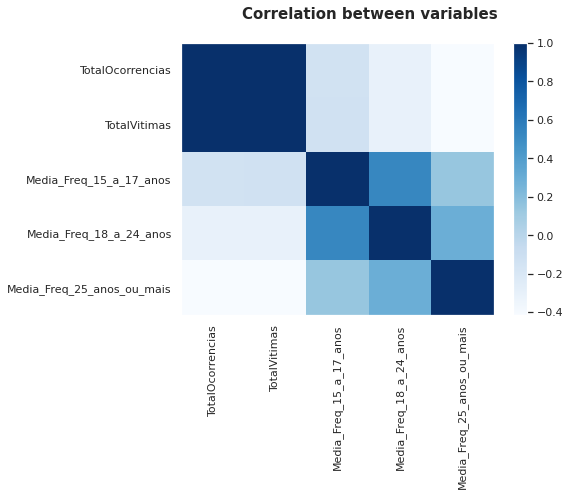

In [ ]:
corr = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

*  ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
*  ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
*  ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
*  ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
*  ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [ ]:
df.corr("pearson")

,TotalOcorrencias,TotalVitimas,Media_Freq_15_a_17_anos,Media_Freq_18_a_24_anos,Media_Freq_25_anos_ou_mais
TotalOcorrencias,1.000000,0.999504,-0.138337,-0.309076,-0.410559
TotalVitimas,0.999504,1.000000,-0.136732,-0.306257,-0.413316
Media_Freq_15_a_17_anos,-0.138337,-0.136732,1.000000,0.529551,0.142278
Media_Freq_18_a_24_anos,-0.309076,-0.306257,0.529551,1.000000,0.292215
Media_Freq_25_anos_ou_mais,-0.410559,-0.413316,0.142278,0.292215,1.000000


In [ ]:
df.corr("spearman")

,TotalOcorrencias,TotalVitimas,Media_Freq_15_a_17_anos,Media_Freq_18_a_24_anos,Media_Freq_25_anos_ou_mais
TotalOcorrencias,1.000000,0.998168,-0.183128,-0.310471,-0.549472
TotalVitimas,0.998168,1.000000,-0.188077,-0.301548,-0.567156
Media_Freq_15_a_17_anos,-0.183128,-0.188077,1.000000,0.534619,0.157288
Media_Freq_18_a_24_anos,-0.310471,-0.301548,0.534619,1.000000,0.287607
Media_Freq_25_anos_ou_mais,-0.549472,-0.567156,0.157288,0.287607,1.000000


Concluimos que não há correlação entre as variáveis 'TotalOcorrencias' e 'Media_freq'

===================================================

* Em 2018 foi sancionada a Lei nº 13.675/2018. Sistema Único de Segurança Pública (SUSP).

* O SUSP garante a integração de dados, prevê políticas que melhorem a qualidade de vida dos agentes de segurança e o enfrentamento à criminalidade violenta, além de efetivar o repasse de recursos do Fundo Nacional de Segurança Pública destinados aos estados, ao Distrito Federal e aos municípios.

* Através do uso de teste de hipótese vamos verificar se ouve alteração no número de ocorrência de crimes após a aplicação da lei

In [ ]:
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df_2 = pd.read_json('gs://data_lake_ingest_data/2_temp/temp_pandas_ocorrencias_normalizado.json')
df_2

,UF,TipoCrime,Ano,Mes,Ocorrencias
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0
...,...,...,...,...,...
15890,Tocantins,Roubo a instituição financeira,2016,dezembro,0
15891,Tocantins,Roubo de carga,2016,dezembro,1
15892,Tocantins,Roubo de veículo,2016,dezembro,63
15893,Tocantins,Roubo seguido de morte (latrocínio),2016,dezembro,3


In [ ]:
df_2['Mes'].unique()

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
      dtype=object)

In [ ]:
ocorrencia_antes = df_2.loc[(df_2['Ano'] < 2018)]

In [ ]:
mes_antes = df_2.Mes.isin(['janeiro', 'fevereiro', 'março', 'abril', 'maio'])

In [ ]:
ano_2018 = df_2.Ano == 2018

In [ ]:
ocrr_2018_antes = df_2.loc[ano_2018 & mes_antes]

In [ ]:
ocrr_2018_antes

,UF,TipoCrime,Ano,Mes,Ocorrencias
7208,Acre,Estupro,2018,janeiro,14
7209,Acre,Furto de veículo,2018,janeiro,74
7210,Acre,Homicídio doloso,2018,janeiro,51
7211,Acre,Lesão corporal seguida de morte,2018,janeiro,0
7212,Acre,Roubo a instituição financeira,2018,janeiro,1
...,...,...,...,...,...
10050,Tocantins,Roubo a instituição financeira,2018,maio,1
10051,Tocantins,Roubo de carga,2018,maio,0
10052,Tocantins,Roubo de veículo,2018,maio,85
10053,Tocantins,Roubo seguido de morte (latrocínio),2018,maio,1


In [ ]:
ocrr_antes_merge = pd.concat([ocrr_2018_antes, ocorrencia_antes])

In [ ]:
ocrr_antes_merge

,UF,TipoCrime,Ano,Mes,Ocorrencias
7208,Acre,Estupro,2018,janeiro,14
7209,Acre,Furto de veículo,2018,janeiro,74
7210,Acre,Homicídio doloso,2018,janeiro,51
7211,Acre,Lesão corporal seguida de morte,2018,janeiro,0
7212,Acre,Roubo a instituição financeira,2018,janeiro,1
...,...,...,...,...,...
15890,Tocantins,Roubo a instituição financeira,2016,dezembro,0
15891,Tocantins,Roubo de carga,2016,dezembro,1
15892,Tocantins,Roubo de veículo,2016,dezembro,63
15893,Tocantins,Roubo seguido de morte (latrocínio),2016,dezembro,3


In [ ]:
ocrr_depois = df_2.loc[(df_2['Ano'] > 2018)]

In [ ]:
mes_depois = df_2.Mes.isin(['julho','agosto', 'setembro', 'outubro', 'novembro', 'dezembro'])

In [ ]:
ocrr_2018_depois = df_2.loc[ano_2018 & mes_depois]

In [ ]:
ocrr_depois_merge = pd.concat([ocrr_2018_depois, ocrr_depois])

In [ ]:
ocrr_depois_merge

,UF,TipoCrime,Ano,Mes,Ocorrencias
7262,Acre,Estupro,2018,julho,16
7263,Acre,Furto de veículo,2018,julho,56
7264,Acre,Homicídio doloso,2018,julho,51
7265,Acre,Lesão corporal seguida de morte,2018,julho,0
7266,Acre,Roubo a instituição financeira,2018,julho,0
...,...,...,...,...,...
7203,Tocantins,Roubo a instituição financeira,2019,dezembro,0
7204,Tocantins,Roubo de carga,2019,dezembro,0
7205,Tocantins,Roubo de veículo,2019,dezembro,51
7206,Tocantins,Roubo seguido de morte (latrocínio),2019,dezembro,0


In [ ]:
def estrati_estado (data,uf):
  estado = data.UF.isin([uf])
  return estado

df_2.loc[estrati_estado(df_2,'Acre')]

,UF,TipoCrime,Ano,Mes,Ocorrencias
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0
...,...,...,...,...,...
13114,Acre,Roubo a instituição financeira,2016,dezembro,0
13115,Acre,Roubo de carga,2016,dezembro,0
13116,Acre,Roubo de veículo,2016,dezembro,0
13117,Acre,Roubo seguido de morte (latrocínio),2016,dezembro,4


In [ ]:
df_2['UF'].unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [ ]:
ocrr_antes_merge['Ocorrencias'].describe()

count    6988.000000
mean      245.585289
std       787.168099
min         0.000000
25%         3.000000
50%        36.000000
75%       205.250000
max      9872.000000
Name: Ocorrencias, dtype: float64

In [ ]:
ocrr_depois_merge['Ocorrencias'].describe()

count    8665.000000
mean      176.696942
std       557.436760
min         0.000000
25%         2.000000
50%        32.000000
75%       156.000000
max      8558.000000
Name: Ocorrencias, dtype: float64

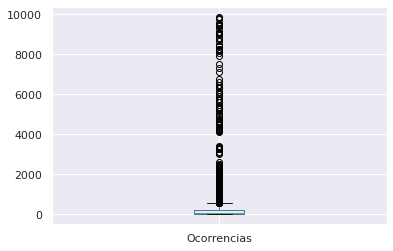

In [ ]:
ocrr_antes_merge[ocrr_antes_merge['Ocorrencias'] > 0]['Ocorrencias'].plot(kind='box')

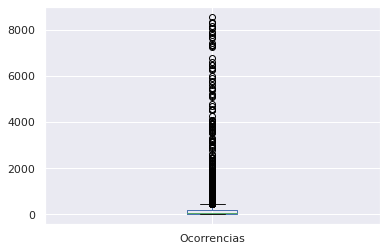

In [ ]:
ocrr_depois_merge[ocrr_depois_merge['Ocorrencias'] > 0]['Ocorrencias'].plot(kind='box')



*   H0: O número de ocorrências não diminuiu depois da Lei
*   H1: O número de ocorrências diminuiu depois da Lei



In [ ]:
arr_estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']

In [ ]:
ocrr_antes_merge_estado = ocrr_antes_merge.loc[estrati_estado(ocrr_antes_merge,'Acre')]

In [ ]:
stats.shapiro(ocrr_antes_merge_estado['Ocorrencias'].dropna())


(0.5282872915267944, 6.478121439591874e-26)

In [ ]:
for i in arr_estados:
  ocrr_antes_merge_estado = ocrr_antes_merge.loc[estrati_estado(ocrr_antes_merge,i)]
  print("Estado", i)
  print(stats.shapiro(ocrr_antes_merge_estado['Ocorrencias'].dropna()))
  print("---------------")

Estado Acre
(0.5282872915267944, 6.478121439591874e-26)
---------------
Estado Alagoas
(0.7521891593933105, 1.6109986079384357e-19)
---------------
Estado Amapá
(0.8688415884971619, 2.7050239760802175e-13)
---------------
Estado Amazonas
(0.737622857093811, 4.772337441650572e-20)
---------------
Estado Bahia
(0.7716934680938721, 8.956005467276217e-19)
---------------
Estado Ceará
(0.7511661648750305, 1.4765219170511293e-19)
---------------
Estado Distrito Federal
(0.6631547212600708, 1.8969428954374824e-22)
---------------
Estado Espírito Santo
(0.7840126752853394, 2.801203303838363e-18)
---------------
Estado Goiás
(0.6874921321868896, 1.0326891524875308e-21)
---------------
Estado Maranhão
(0.8173143267631531, 7.92212842559104e-17)
---------------
Estado Mato Grosso
(0.8510528206825256, 3.80460264258909e-15)
---------------
Estado Mato Grosso do Sul
(0.7344422340393066, 3.68380459091744e-20)
---------------
Estado Minas Gerais
(0.6824480295181274, 7.210243199785817e-22)
-------------

In [ ]:
stats.shapiro(ocrr_depois_merge['Ocorrencias'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.2907981276512146, 0.0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


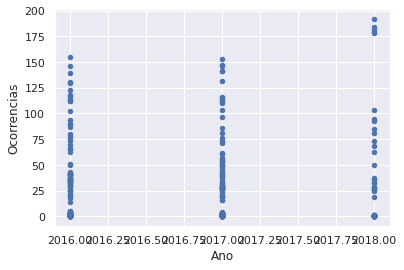

In [ ]:
ocrr_antes_merge_estado.plot.scatter(x='Ano',y='Ocorrencias')

In [ ]:
for i in arr_estados:
  ocrr_depois_merge_estado = ocrr_depois_merge.loc[estrati_estado(ocrr_depois_merge,i)]
  print("Estado", i)
  print(stats.shapiro(ocrr_depois_merge_estado['Ocorrencias'].dropna()))
  print("---------------")

Estado Acre
(0.7537997364997864, 1.6787293277949497e-21)
---------------
Estado Alagoas
(0.8020013570785522, 1.8449423457685658e-19)
---------------
Estado Amapá
(0.8068486452102661, 1.2296218683408221e-18)
---------------
Estado Amazonas
(0.8062971234321594, 2.2181287565309856e-19)
---------------
Estado Bahia
(0.7988641262054443, 9.912675905598622e-20)
---------------
Estado Ceará
(0.7779566049575806, 1.1519944058221414e-20)
---------------
Estado Distrito Federal
(0.6780170202255249, 2.1890708681874877e-24)
---------------
Estado Espírito Santo
(0.7883585095405579, 3.2950975576771406e-20)
---------------
Estado Goiás
(0.6909681558609009, 6.3456736411056254e-24)
---------------
Estado Maranhão
(0.8404558897018433, 1.24351600041036e-17)
---------------
Estado Mato Grosso
(0.8639353513717651, 2.901437510134517e-16)
---------------
Estado Mato Grosso do Sul
(0.7191389799118042, 5.581796749613868e-23)
---------------
Estado Minas Gerais
(0.6218401193618774, 4.2434402732160756e-26)
------